In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
from sklearn import datasets


ModuleNotFoundError: No module named 'torch'

In [ ]:
DEVICE = ("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cpu


In [ ]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))

In [ ]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

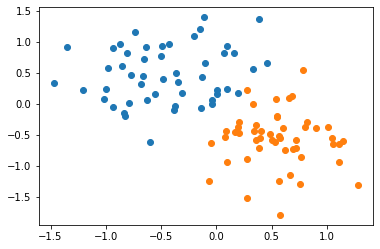

In [ ]:
scatter_plot()

In [ ]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred

In [ ]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [ ]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
    return (w1.item(), w2.item(), b[0].item())

In [ ]:
def plot_fit(title):
    plt.title = title
    # 0 = w1x1 + w2x2 + b
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    x2 = (w1*x1 + b1)/-w2
    plt.plot(x1, x2, 'r')
    scatter_plot()

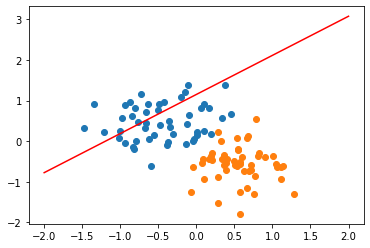

In [ ]:
plot_fit('Initial Model')

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch:",i,"loss", loss.item())
    

    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

ValueError: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.